flip [16, 25] 0
flip [27, 11] 0
flip [21, 20] 0
flip [9, 4] 0
flip [0, 9] 0
flip [30, 22] 0
flip [15, 33] 0
flip [34, 39] 0
flip [44, 42] 0
flip [43, 42] 0
flip [11, 39] 0
flip [15, 33] 0
flip [41, 47] 0
flip [30, 41] 0
flip [0, 27] 0
flip [25, 29] 0
flip [8, 39] 0
flip [24, 30] 0
flip [11, 39] 0
flip [21, 24] 0
flip [3, 11] 0
flip [1, 34] 0
flip [17, 23] 0
flip [34, 40] 0
flip [9, 24] 0
flip [48, 48] 0
flip [46, 38] 0
flip [14, 9] 0
flip [17, 6] 0
flip [1, 44] 0
flip [44, 10] 0
flip [39, 15] 0
flip [41, 40] 0
flip [16, 43] 0
flip [19, 30] 0
flip [8, 10] 0
flip [8, 21] 0
flip [43, 6] 0
flip [3, 32] 0
flip [43, 37] 0
flip [21, 2] 0
flip [15, 33] 0
flip [19, 12] 0
flip [34, 3] 0
flip [1, 41] 0
flip [15, 28] 0
flip [14, 8] 0
flip [14, 0] 0
flip [17, 10] 0
flip [33, 1] 0
flip [19, 29] 0
flip [4, 2] 0
flip [40, 16] 0
flip [35, 32] 0
flip [44, 36] 0
flip [34, 31] 0
flip [14, 7] 0
flip [27, 12] 0
flip [43, 34] 0
flip [48, 43] 0
flip [43, 25] 0
flip [16, 31] 0
flip [37, 7] 0
flip [42, 39] 0
fl

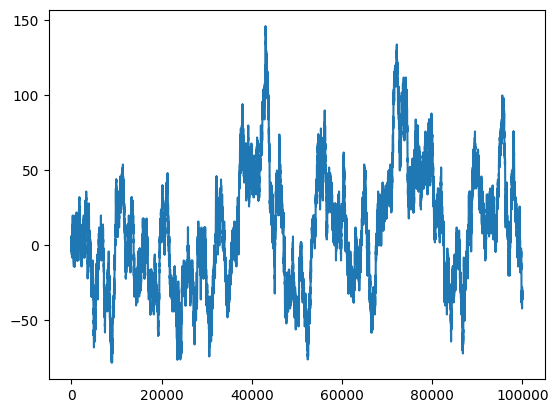

In [3]:
import numpy as np
import scipy.constants
import matplotlib.pyplot as plt



class Lattice:
    def __init__(self,n = 4,m = 10, T = 298, mean = 0.0):
        np.random.seed(0)
        #xdim
        self.m = m
        #ydim
        self.n = n
        self.beta = 1 / (scipy.constants.k * T)
        self.mean = mean
        self.lattice = self.generate_lattice()
        

    
    def generate_lattice(self):
        #generating m x n lattice of -1,1 spins
        #with mean value of self.mean
        choices = np.array([-1,1])
        p = 0.5 * (self.mean+1)
        p_choices = [1-p,p]
        lattice = np.random.choice(choices, p = p_choices, size = (self.n, self.m))
        return lattice
    

    def flip_energy(self, k = 4,site = [0,0], axis = 1):
        #calculate the energy change of k-spin flip with specififed site and orientation
        #axis: [1,-1,2,-2]
        #site: [0:m-1,0:n-1]

        sitex = site[0]
        sitey = site[1]

        #extract k_string padded with 1 width of neighbours on x and y
        if axis == 1:
            x_indices = (sitex-1 + np.arange(k+2)) % self.m
            y_indices = [(sitey - 1) % self.n, sitey % self.n, (sitey + 1) % self.n]

        k_string = self.lattice[y_indices,x_indices[:, None]]




        E = 0
        for i in range(1,k+1):
            E += k_string[i][1] * (k_string[i][0] + k_string[i][2])
        E += k_string[0][1] * k_string[1][1]
        E += k_string[-1][1] * k_string[-2][1]
        
        #performing flip inverts these interaction energies
        E *= -1
        return E


    def do_flip(self,k=4,site=[0,1],axis = 1):
        sitex = site[0]
        sitey = site[1]
        x_indices = (sitex + np.arange(k)) % self.m
        y_indices = [sitey]
        self.lattice[y_indices,x_indices[:, None]] *= -1







def run_metropolis_algorithm(max_iter = 100000,k = 1,n = 50, m = 50):
    current_iteration = 0
    accepted_candidates = 0
    M = []

    L = Lattice(n = n, m = m)
    while current_iteration <= max_iter:
        
        site = [np.random.randint(0,n-1) for i in range(2)]
        E = L.flip_energy(k = k, site = site)
        if E > 0:
            pass
        elif np.random.rand() < np.exp(L.beta * E):
            print('flip', site,E)

            L.do_flip(site = site, k = k)



        current_iteration += 1

        M.append(L.lattice.sum())


    plt.plot(M)










run_metropolis_algorithm(n = 50, m = 50)




